# Mean Shift

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

O Mean Shift é uma técnica não-paramétrica de análise de espaço de características para localizar os máximos de uma função de densidade. Pode ser usado para análise de cluster, visão computacional e processamento de imagem. Foi originalmente proposto em 1975.

Em contraste com o algoritmo K-Means, a saída do Mean Shift não depende de quaisquer suposições explícitas sobre a forma da distribuição de pontos de dados, o número de clusters ou qualquer forma de inicialização aleatória.

Uma formulação geral do algoritmo Mean Shift pode ser desenvolvida através da consideração de núcleos (Kernels) de densidade. Esta abordagem é muitas vezes referida como estimativa de densidade de kernel - um método para estimativa de densidade que muitas vezes converge mais rapidamente e que também gera uma boa estimativa contínua para a função de densidade.

Essencialmente, o Mean Shift trata o problema de agrupamento supondo que todos os pontos dados representam amostras de alguma função de densidade de probabilidade, com regiões de alta densidade de amostra correspondendo aos máximos locais desta distribuição. Para encontrar esses máximos locais, o algoritmo funciona permitindo que os pontos se atraiam, por meio do que poderia ser considerado uma força gravitacional de curto alcance. Permitindo que os pontos gravitem para áreas de maior densidade, pode-se mostrar que eles eventualmente se unificarão em uma série de pontos, próximos aos máximos locais da distribuição. Esses pontos de dados que convergem para os mesmos máximos locais são considerados membros do mesmo cluster.

http://docs.opencv.org/3.1.0/db/df8/tutorial_py_meanshift.html

## Exemplo 1

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

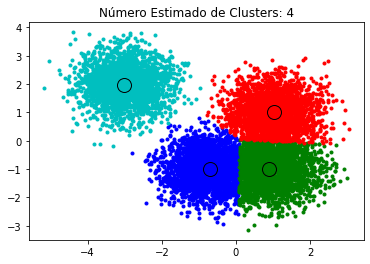

In [5]:
# Gera massa de dados
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# Cria o modelo

# bandwidth = Comprimento da Interação entre os exemplos, também conhecido como a largura de banda do algoritmo.
bandwidth = estimate_bandwidth(X, quantile = .1, n_samples = 500)
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
n_clusters_ = labels.max()+1
 
#%% Plot 
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
plt.title('Número Estimado de Clusters: %d' % n_clusters_)
plt.show()

## Exemplo 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
style.use("ggplot")

In [8]:
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

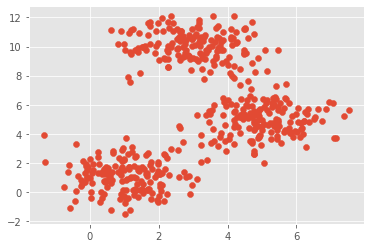

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [10]:
# Criação do modelo
modelo = MeanShift()

In [11]:
# Fit
modelo.fit(X)

MeanShift()

In [12]:
# Coletando labels e centróides
labels = modelo.labels_
cluster_centers = modelo.cluster_centers_

In [13]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Número Estimado de Clusters:", n_clusters_)

[[ 5.00437117  4.96432659]
 [ 1.07172546  1.05999803]
 [ 2.99291914 10.1177615 ]]
Número Estimado de Clusters: 3


In [14]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

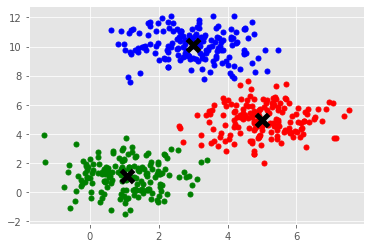

In [15]:
# Plot
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = "x", color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()

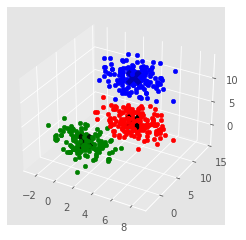

In [16]:
# Plot 3d

# Centróides e massa de dados
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)

# Modelo
modelo = MeanShift()
modelo.fit(X)

# Extraindo labels e centróides
labels = modelo.labels_
cluster_centers = modelo.cluster_centers_
n_clusters_ = len(np.unique(labels))

# Cores
colors = 10*['r','g','b','c','k','y','m']

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c = colors[labels[i]], marker = 'o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
           marker = "x",
           color = 'k', 
           s = 150, 
           linewidths = 5, 
           zorder = 10)
plt.show()